# Social Media Data - Twitter

## Where is all the flour gone?

#### With lockdown measures introduced throughout the world, many people are starting baking home more. But what exactly are they baking? This analysis explores Twitter data and tries to answer

**Simone Lombardini - 27 April 2020**

**Key words**: Social Media Data, Twitter, GetOldTweets3

This is a photo I've taken at the supermarket the other week showing empty shelves of flour. I'm sure, it is now a familiar scene for many people in the United Kingdom and elsewhere. Something that was unthinkable just a couple of months ago, and now part of our adjusted post-covid19 daily life.

![emptyshelfs](image/emptyshelfs.JPG)

The first reaction I had, when seen this was to feel vulnerable. It was a stark reminder of how lucky I am to live in a part of the world where there are institutions and systems in place to support basic needs, such as access to food. It also made me appreciate even more all those organisations working and supporting other parts of the world where access to food is more challenging and at risk. 

The following reaction was asking myself: why flour? The rest of the supermarket was well stocked. Was past gone the time when the same supermarket was half-empty, as many families had been increasing their shopping to prepare for the unknown coming from covid19. 

If the rest of the products are back, is it possible that shelfs are empty of flour because more people are baking more as they are locked at home? This has certainly been my experience. Baking has been a fun and entertaining activity to keep my daughter and me busy, with a delicious outcome. Of course with flour it is possible to bake plenty of things: cakes, bread, pizzas, just to mention few. I wonder how other people have been using their increased time and diminished flour supply; so I decided to explore if it is possible to find an answer in social media data. 

### Twitter data

I decided to start looking into Twitter data to understand what people have been baking since the beginning of the lockdown. 

For doing this, I decided to look Twitter data, following this guideline [(Web data collection using Twitter as an example)](https://policy-practice.oxfam.org.uk/publications/going-digital-web-data-collection-using-twitter-as-an-example-620948)  written by Nicole Schwitter and Ulf Liebe from the University of Warwick, for Oxfam GB's Going Digital series. The examples there are in R, while here I will be using Python, but the concepts are the same. Moreover, Nicole, Alexia and I also recently recorded a podcast on the same topic. 

My hope is that people share pictures and stories on social media. This is not an unrealistic assumption. Judging by the number of pictures coming from friends in WhatsApp chats, it seems that people like to take pictures of their freshly baked products and share them with friends. 

It remains to see if Twitter is necessarily the most indicated social media. Instagram might also be a good candidate as mostly based on pictures, but for now, let's go with Twitter.  I will leave the code to make this, if not replicable, at least as transparent as possible. 

In [1]:
import tweepy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import GetOldTweets3 as got
import glob

from random import randint
from time import sleep

### Data collection
The firsts challenge is to gather the data. 

Ideally, we would like to get back in time to a time before the lockdown and set up a data collection process so that every time someone tweets something about baking, it records the tweet. This is called _streaming API_. Have a look at Nicole and Ulf's guidelines; they are doing an excellent job in explaining different data collection options. 

As time-travel is not an option yet, the other option is to look back (called _REST API_). This involves looking back at past tweets. `Tweepy` (https://www.tweepy.org/) and `Twitter API` are an option. However, in the end, I decided to use `GetOldTweets3` (https://pypi.org/project/GetOldTweets3/) as it allows to go back further in time and retrieve tweets from a specific search.  

After a bit of research, I find that these keywords, or hashtags, seem to be frequently used when people post about their culinary adventures on social media. 

In [2]:
searchq = ["quarantinebaking", "quarantinecooking" "homebaked", "homemade", "covid19", "quarantine", "baking", "QuarantineLife", "lockdown", "StayHome"]

I used `GetOldTweets3` to obtain for each day from March 1st to April 26th up to 100 tweets containing each of these keywords, which will give us more than 40,000 tweets. 

In [3]:
def download_tweets(startdate, enddate, q):
    print(f"Downloading for {startdate} - {enddate} for {q}")
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(q)\
                                           .setSince(startdate)\
                                           .setUntil(enddate)\
                                           .setMaxTweets(100)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    df = pd.DataFrame([tweet.__dict__ for tweet in tweets])
    print(df.shape)
    df.to_csv(f"data/twitter_raw/tweets-raw-{startdate}_{q}.csv", index=False)

In [ ]:
for q in searchq:
    # Download tweets in March
    for x in range(1, 30):
        sleep(randint(1,10))
        startdate = f"2020-03-{x}"
        enddate = f"2020-03-{x+1}"
        download_tweets(startdate, enddate, q)
    # Download tweets in April
    for x in range(1, 26):
        sleep(randint(1,10))
        startdate = f"2020-04-{x}"
        enddate = f"2020-04-{x+1}"
        download_tweets(startdate, enddate, q)

In [4]:
filenames = glob.glob("data/twitter_raw/tweets-raw-*.csv") 
dataframes = [pd.read_csv(filename) for filename in filenames]
df = pd.concat(dataframes)
df.shape

(40298, 15)

In [5]:
df = df.dropna(subset=['text'])
df.to_csv("data/tweets_flour.csv", index=False)

### Analysis


I decided to narrow my research on bread, pizza, cake, and sourdough. Not for any scientific or rigorous choice, just because those are the dish I like the most.

#### Trends overtime

First, I want to do is to observe how frequently the words _"bread"_, _"pizza"_, _"cake"_, and _"sourdough"_ appear in the sample of over 40,000 tweets, and see the change over time of the word.

In [6]:
df = pd.read_csv("data/tweets_flour.csv")
df['bread'] = np.where(df['text'].str.contains("bread", case=False, na=False), 1, 0)
df['pizza'] = np.where(df['text'].str.contains("pizza", case=False, na=False), 1, 0)
df['cake'] = np.where(df['text'].str.contains("cake", case=False, na=False), 1, 0)
df['sourdough'] = np.where(df['text'].str.contains("sourdough", case=False, na=False), 1, 0)

baking = ['bread', 'pizza', 'cake', 'sourdough']
df[baking].describe()

,bread,pizza,cake,sourdough
count,40278.000000,40278.000000,40278.000000,40278.000000
mean,0.047172,0.011247,0.031109,0.010527
std,0.212010,0.105454,0.173614,0.102060
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


That _bread_ is the word that appears most frequently in our sample, over 4,7% of the time, followed by _cake_ 3%. On the other side _pizza_ and _sourdough_ are both near 1%.

And now let's see how they appear overtime since March 1st:

In [7]:
df['shortdate'] = df['date'].apply(lambda d: d[0:10])
grouped_date = df[['shortdate', 'bread', 'pizza', 'cake', 'sourdough']].groupby('shortdate', as_index = False).sum()
grouped_date.head()

,shortdate,bread,pizza,cake,sourdough
0,2020-03-01,14,5,15,0
1,2020-03-02,12,4,24,1
2,2020-03-03,9,3,15,0
3,2020-03-04,8,5,20,0
4,2020-03-05,12,3,11,3


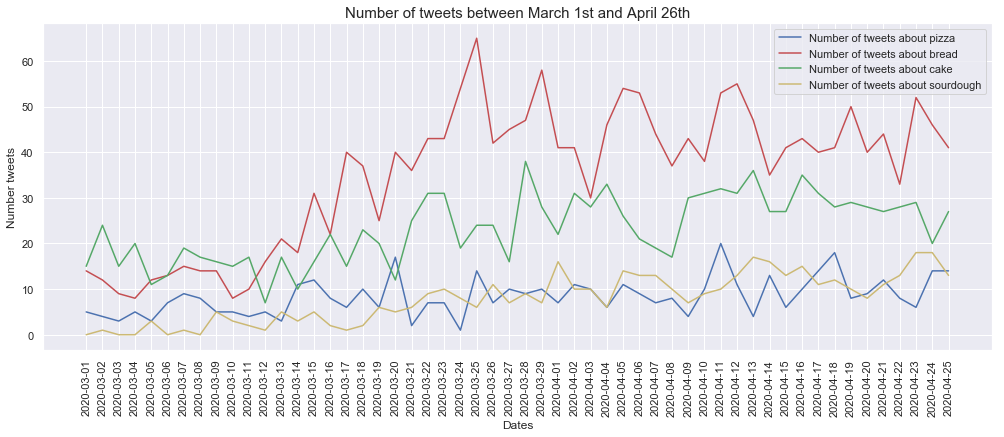

In [13]:
x = grouped_date['shortdate']
y_pizza = grouped_date['pizza']
y_bread = grouped_date['bread']
y_cake = grouped_date['cake']
y_sourdough = grouped_date['sourdough']

plt.figure(figsize=(17,6))

sns.set(style='darkgrid')
sns.lineplot(x, y_pizza, color="b", label = 'Number of tweets about pizza')
sns.lineplot(x, y_bread, color="r", label = 'Number of tweets about bread')
sns.lineplot(x, y_cake, color="g", label = 'Number of tweets about cake')
sns.lineplot(x, y_sourdough, color="y", label = 'Number of tweets about sourdough')

plt.xlabel("Dates", fontsize= 12)
plt.ylabel("Number tweets", fontsize= 12)
plt.title("Number of tweets between March 1st and April 26th", fontsize= 15)

plt.xticks(x, x, rotation='vertical')

plt.savefig("image/tweetsovertime.png")

As there is quite a bit of short-term variation, let's take the moving average over 5 days to observe the longer-term trend. 

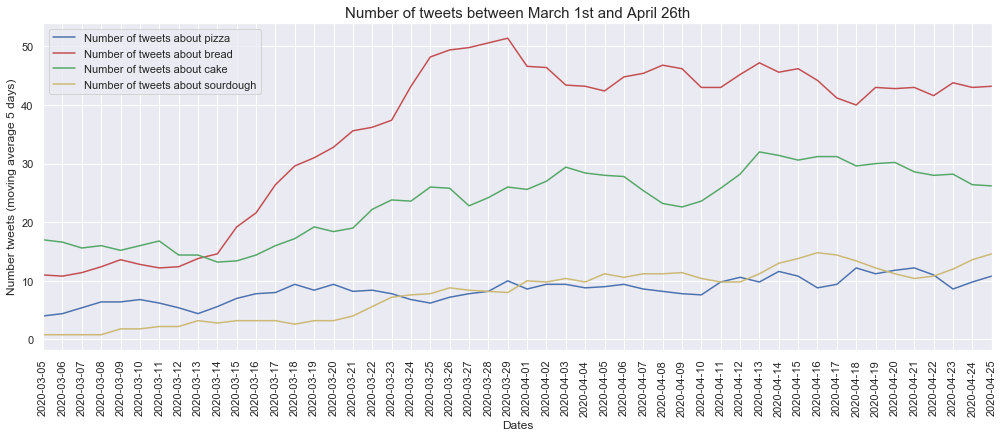

In [14]:
y_rolling_pizza = y_pizza.rolling(5).mean()
y_rolling_bread = y_bread.rolling(5).mean()
y_rolling_cake = y_cake.rolling(5).mean()
y_rolling_sourdough = y_sourdough.rolling(5).mean()

plt.figure(figsize=(17,6))

sns.set(style='darkgrid')
sns.lineplot(x, y_rolling_pizza, color="b", label = 'Number of tweets about pizza')
sns.lineplot(x, y_rolling_bread, color="r", label = 'Number of tweets about bread')
sns.lineplot(x, y_rolling_cake, color="g", label = 'Number of tweets about cake')
sns.lineplot(x, y_rolling_sourdough, color="y", label = 'Number of tweets about sourdough')

plt.xlabel("Dates", fontsize= 12)
plt.ylabel("Number tweets (moving average 5 days)", fontsize= 12)
plt.title("Number of tweets between March 1st and April 26th", fontsize= 15)

plt.xticks(x, x, rotation='vertical')

plt.xlim(['2020-03-05', '2020-04-25'])

plt.savefig("image/tweetsovertime_movingavg.png")

What appears from this graph is that _bread_ is the word that has increased the most since March 1st, from nearly ten tweets per day to up to 50 per day.  Also _cake_, _pizza_, and _sourdough_ all increased in the last few weeks, with _sourdough_ moving from nearly zero to levels taken by the bread in early March.  

#### Day of the week

Second, I want to see if people tend to bake (or better said, tweet about baking) on a particular day of the week.

In [15]:
df['dayweek'] = df['formatted_date'].apply(lambda d: d[0:3])
grouped_day = df[['dayweek', 'bread', 'pizza', 'cake', 'sourdough']].groupby('dayweek', as_index = False).sum()
grouped_day['total'] = grouped_day['bread'] + grouped_day['pizza'] + grouped_day['cake'] + grouped_day['sourdough'] 
grouped_day.head()

,dayweek,bread,pizza,cake,sourdough,total
0,Fri,273,85,168,65,591
1,Mon,231,46,178,56,511
2,Sat,297,89,212,60,658
3,Sun,319,72,193,58,642
4,Thu,274,52,187,71,584


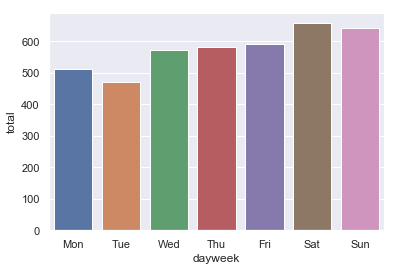

In [20]:
sns.barplot(x="dayweek", y="total", data=grouped_day, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

Overall it seems the most popular day for baking is Saturday. But is it the case for all four categories?

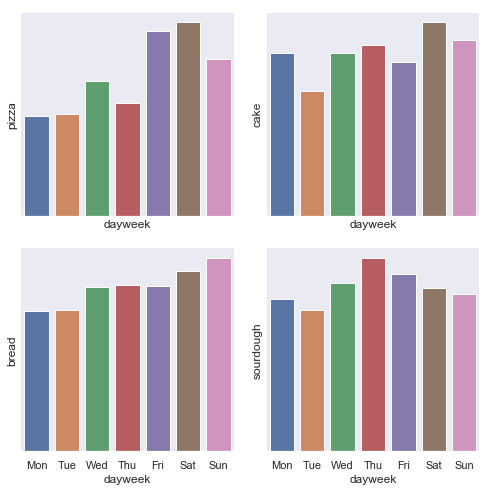

In [22]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

sns.barplot(x="dayweek", y="pizza", data=grouped_day, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ax=axes[0, 0])
sns.barplot(x="dayweek", y="bread", data=grouped_day, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ax=axes[1, 0])
sns.barplot(x="dayweek", y="cake", data=grouped_day, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ax=axes[0, 1])
sns.barplot(x="dayweek", y="sourdough", data=grouped_day, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

plt.savefig("image/dayweek.png")

While Saturday is the most popular day for baking _pizzas_ and _cakes_, bread and sourdough are baked more respectively on Sundays and Thursdays.

### Conclusions

From this analysis, it seems that most of the flour is going into producing homemade bread, followed by a smaller degree by cake producers. 

Perhaps unsurprisingly Saturday and Sunday are overall the most popular days for baking, except sourdough which is more popular on Thursdays. 

Of course, this is a more than a questionable approach to have a precise answer. Not only our sample of tweets is given by the choice of keywords used during data collection. But most importantly, most of the amateur bakers buying flour in great quantities, are not necessarily posting their produce on Twitter or social media. 

None the less, it is fun to see how keywords associated with food has so drastically increased their presence on social media in recent weeks. 

And you, what is your experience with baking and lockdown? Are there any new recipes you discovered? 

From my side, I am particularly fond of sourdough loaf and sourdough pizza:

![sourdough](image/sourdough.JPG)

![pizza](image/pizza.JPG)

### Links and references

https://policy-practice.oxfam.org.uk/publications/going-digital-web-data-collection-using-twitter-as-an-example-620948

https://investigate.ai/bloomberg-tweet-topics/scrape-tweets-from-presidential-primary-candidates/

https://github.com/Mottl/GetOldTweets3